In [25]:
import numpy as np
import scipy.integrate as integrate
from matplotlib import pyplot as plt

In [26]:
def Integrand(x):
    return((15/(np.pi**4))*(x**3/(np.exp(x)-1)))

In [27]:
def Simpsons(x1,x2,num):
    h = (x2-x1)/num
    simpsons = Integrand(x1)+Integrand(x2)
    s = 0.0
    for k in range(1,num,2):
        s += Integrand(x1+k*h)
    simpsons += 4*s 
    s = 0.0
    for k in range(2,num,2):
        s += Integrand(x1+k*h)
    simpsons += 2*s
    simpsons = (1/3)*h*simpsons
    return(simpsons)

In [28]:
def EfficiencyCalculator(T, num):
    x1 = (hc/(lamda1*kb*T))
    x2 = (hc/(lamda2*kb*T))
    x = np.linspace(x2,x1,num)
    simp = Simpsons(x2,x1,num)
    return(simp)

Part a)

Write a Python function that takes a temperature T as its argument and calculates the
value of h for that temperature from the formula above. The integral in the formula cannot
be done analytically, but you can do it numerically using Simpson’s Rule. Ensure
that you are choosing a high enough number of steps that your answer is convergent.
Use your function to make a graph of h as a function of temperature between 300 K and
10,000 K. You should see that there is an intermediate temperature where the efficiency
is a maximum. What is that maximum temperature?

In [29]:
hc = 1239.8419 #eV nanormeter
kb = 8.6173303*10**(-5) #eV K^-1
lamda1 = 450 #naonmeter
lamda2 = 750 #naonmeter

T = np.linspace(300,10000,10000)
Efficiency = np.empty([len(T),1],dtype = float)
MaxEfficiency = 0.0
MaxTemperature = 0.0

for i in range(len(T)):
    Efficiency[i] = EfficiencyCalculator(T[i],100)
    if Efficiency[i] > MaxEfficiency:
        MaxEfficiency = Efficiency[i]
        MaxTemperature = T[i]

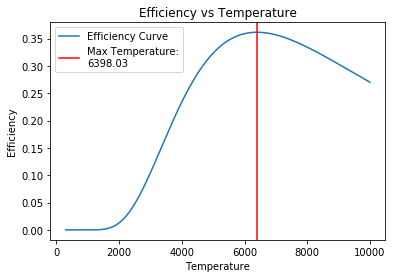

The maximum temperature is, 6398.03 K
The maximum efficiency is, 0.36


In [31]:
plt.plot(T,simp, label = "Efficiency Curve")
plt.axvline(x = MaxTemperature, color='r',label = "Max Temperature:\n"+str(np.round(MaxTemperature,2)))

plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Efficiency")
plt.title("Efficiency vs Temperature")
plt.show()

print("The maximum temperature is, "+str(np.round(MaxTemperature,2))+" K")
print("The maximum efficiency is, "+str(np.round(MaxEfficiency[0],2)))

Part b)

Is it practical to run a tungsten-filament light bulb at the temperature you found? If not,
why not?

No, because the melting pont of Tungsten is 3,695 K.